In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [6]:
def cross_validate(model_class, X, y, alphas, k=5, **kwargs):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    avg_mse = []

    for alpha in alphas:
        mses = []
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            model = model_class(alpha=alpha, **kwargs)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            mses.append(mean_squared_error(y_val, y_pred))

        avg_mse.append(np.mean(mses))

    best_alpha = alphas[np.argmin(avg_mse)]
    return best_alpha, avg_mse

In [7]:
def run_regressions(X_train, y_train, X_test, y_test, dataset_name="Dataset"):
    results = {}

    # Unregularized Linear Regression
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    y_pred = lin.predict(X_test)
    results['Linear'] = {
        'mse': mean_squared_error(y_test, y_pred),
        'coef': lin.coef_
    }

    # Ridge Regression (with CV for alpha)
    alphas = np.logspace(-3, 3, 20)  # search range
    best_alpha_ridge, _ = cross_validate(Ridge, X_train, y_train, alphas)
    ridge = Ridge(alpha=best_alpha_ridge)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    results['Ridge'] = {
        'mse': mean_squared_error(y_test, y_pred),
        'coef': ridge.coef_,
        'alpha': best_alpha_ridge
    }

    # Lasso Regression (with CV for alpha)
    best_alpha_lasso, _ = cross_validate(Lasso, X_train, y_train, alphas, max_iter=10000)
    lasso = Lasso(alpha=best_alpha_lasso, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    results['Lasso'] = {
        'mse': mean_squared_error(y_test, y_pred),
        'coef': lasso.coef_,
        'alpha': best_alpha_lasso
    }

    # Print summary
    print(f"\n--- {dataset_name} ---")
    for method, res in results.items():
        if 'alpha' in res:
            print(f"{method}: MSE={res['mse']:.4f}, alpha={res['alpha']:.4f}")
        else:
            print(f"{method}: MSE={res['mse']:.4f}")

    # Plot histogram of coefficients
    plt.figure(figsize=(8,6))
    bins = np.linspace(min(min(res['coef']) for res in results.values()),
                       max(max(res['coef']) for res in results.values()), 30)
    for method, res in results.items():
        plt.hist(res['coef'], bins=bins, alpha=0.5, label=method)
    plt.title(f"Coefficient Histogram - {dataset_name}")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

    return results



--- A ---
Linear: MSE=3.2591
Ridge: MSE=2.8577, alpha=6.1585
Lasso: MSE=2.8665, alpha=0.0089


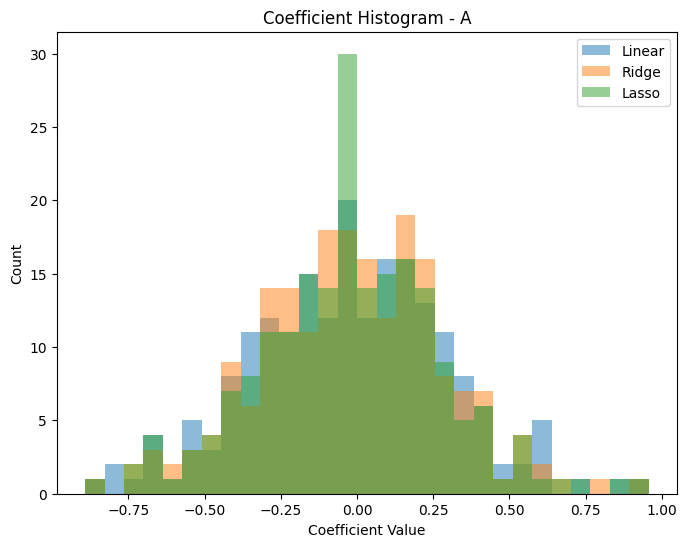


--- B ---
Linear: MSE=2.8060
Ridge: MSE=1.8435, alpha=54.5559
Lasso: MSE=1.8948, alpha=0.0379


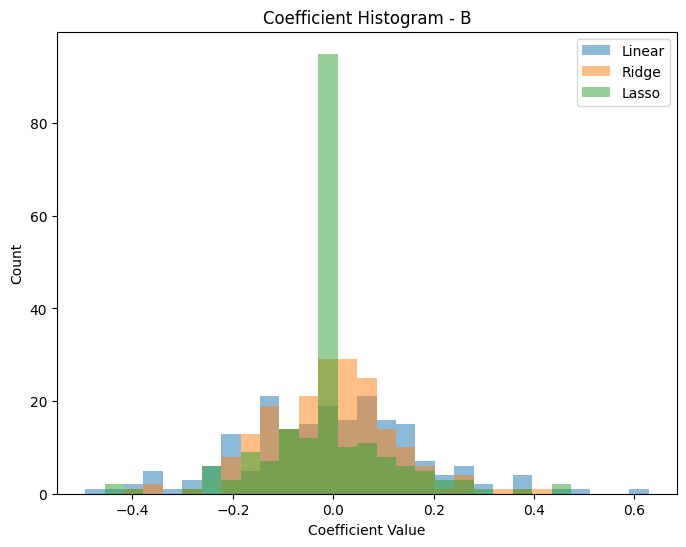


--- C ---
Linear: MSE=537.5165
Ridge: MSE=537.5136, alpha=0.0010
Lasso: MSE=1.1312, alpha=0.0785


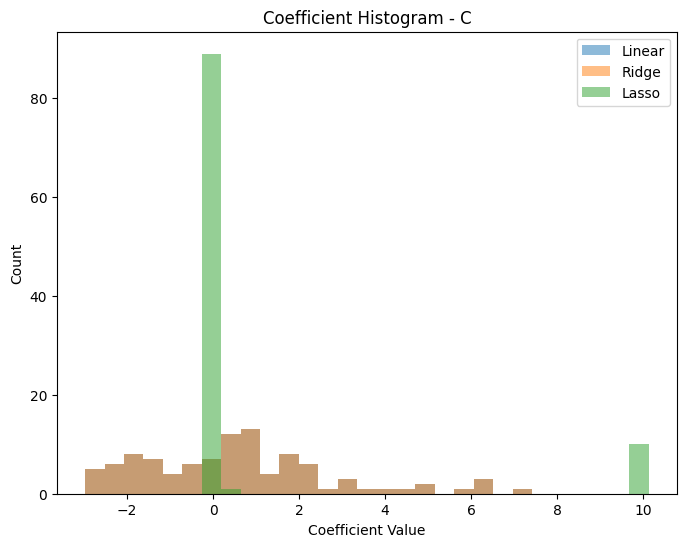

In [17]:
# Load datasets A, B, and C from CSV files
import pandas as pd

# Dataset A
X_train_A = pd.read_csv("./a1-files/X_train_A.csv").values
y_train_A = pd.read_csv("./a1-files/Y_train_A.csv").values.ravel()
X_test_A = pd.read_csv("./a1-files/X_test_A.csv").values
y_test_A = pd.read_csv("./a1-files/Y_test_A.csv").values.ravel()

# Dataset B
X_train_B = pd.read_csv("./a1-files/X_train_B.csv").values
y_train_B = pd.read_csv("./a1-files/Y_train_B.csv").values.ravel()
X_test_B = pd.read_csv("./a1-files/X_test_B.csv").values
y_test_B = pd.read_csv("./a1-files/Y_test_B.csv").values.ravel()

# Dataset C
X_train_C = pd.read_csv("./a1-files/X_train_C.csv").values
y_train_C = pd.read_csv("./a1-files/Y_train_C.csv").values.ravel()
X_test_C = pd.read_csv("./a1-files/X_test_C.csv").values
y_test_C = pd.read_csv("./a1-files/Y_test_C.csv").values.ravel()

y_train_B = pd.read_csv("./a1-files/Y_train_B.csv").values.ravel()
X_test_B = pd.read_csv("./a1-files/X_test_B.csv").values
y_test_B = pd.read_csv("./a1-files/Y_test_B.csv").values.ravel()

# Dataset C
X_train_C = pd.read_csv("./a1-files/X_train_C.csv").values
y_train_C = pd.read_csv("./a1-files/Y_train_C.csv").values.ravel()
X_test_C = pd.read_csv("./a1-files/X_test_C.csv").values
y_test_C = pd.read_csv("./a1-files/Y_test_C.csv").values.ravel()

# Now run the regressions
results_A = run_regressions(X_train_A, y_train_A, X_test_A, y_test_A, dataset_name="A")
results_B = run_regressions(X_train_B, y_train_B, X_test_B, y_test_B, dataset_name="B")
results_C = run_regressions(X_train_C, y_train_C, X_test_C, y_test_C, dataset_name="C")